Course Title: PATTERN RECOGNITION TECHNIQUES

PRT- Ex-5 : Learning Vector Quantization

Code 

Shivam Gupta



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier #K-NN Classifier for comparison
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier for comparison
from sklearn.model_selection import KFold

In [ ]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df = df.drop("Id", axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df = df.rename(columns={"SepalLengthCm": "sl", "SepalWidthCm": "sw", "PetalLengthCm": "pl", 
                   "PetalWidthCm":"pw", "Species":"y"})
df.head()

,sl,sw,pl,pw,y
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


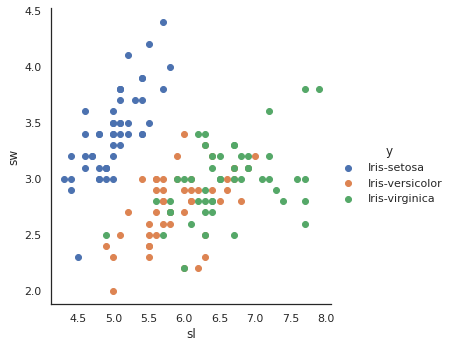

In [ ]:
sns.set(style = "white", color_codes = True)
print(sns.FacetGrid(df, hue = "y", size = 5) \
   .map(plt.scatter, "sl", "sw") \
   .add_legend())

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


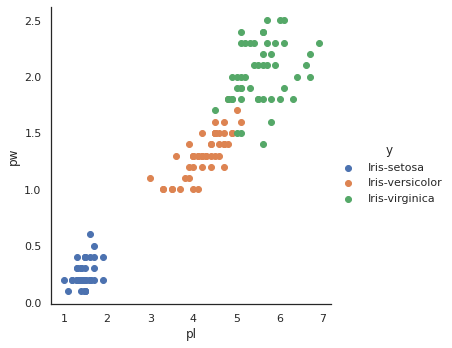

In [ ]:
print(sns.FacetGrid(df, hue = "y", size = 5) \
   .map(plt.scatter, "pl", "pw") \
   .add_legend())

In [ ]:
def dataRandomSet(data, random=None):
    if random != None:
        train_x, test_x, train_y, test_y = train_test_split(df.drop(["y"], axis=1), 
                                                                        df["y"], random_state=random, test_size=0.3)
        test_y = test_y.reset_index(drop=True)
        train_y = train_y.reset_index(drop=True)
        train_x = train_x.reset_index(drop=True)
        test_x = test_x.reset_index(drop=True)

    else:
        train_y = df.loc[0:120, "y"].reset_index(drop=True)
        test_y = df.loc[120: , "y"].reset_index(drop=True)
        train_x = df.iloc[0:120].drop("y", axis=1).reset_index(drop=True)
        test_x = df.iloc[120:].drop("y", axis=1).reset_index(drop=True)
    return train_x, train_y, test_x, test_y

In [ ]:
train_x, train_y, test_x, test_y = dataRandomSet(df, 42) 
train_x.head()

,sl,sw,pl,pw
0,5.5,2.4,3.7,1.0
1,6.3,2.8,5.1,1.5
2,6.4,3.1,5.5,1.8
3,6.6,3.0,4.4,1.4
4,7.2,3.6,6.1,2.5


In [ ]:
def lvq3_train(data, kelas, a, b, max_ep, min_a, e):
    X = data.values
    y = np.array(kelas)
    c, train_idx = np.unique(y, True)
    r = c
    W = X[train_idx].astype(np.float64)
    train = np.array([e for i, e in enumerate(zip(X, y)) if i not in train_idx])
    X = train[:, 0]
    y = train[:, 1]
    ep = 0

    while ep < max_ep and a > min_a:
        for i, x in enumerate(X):
            d = [math.sqrt(sum((w - x) ** 2)) for w in W]
            min_1 = np.argmin(d)

            min_2 = 0
            dc = float(np.amin(d))
            dr = 0
            min_2 = d.index(sorted(d)[1])
            dr = float(d[min_2])
            if c[min_1] == y[i] and c[min_1] != r[min_2]:
                W[min_1] = W[min_1] + a * (x - W[min_1])

            elif c[min_1] != r[min_2] and y[i] == r[min_2]:
                if dc != 0 and dr != 0:

                    if min((dc/dr),(dr/dc)) > (1-e) / (1+e):
                        W[min_1] = W[min_1] - a * (x - W[min_1])
                        W[min_2] = W[min_2] + a * (x - W[min_2])
            elif c[min_1] == r[min_2] and y[i] == r[min_2]:
                W[min_1] = W[min_1] + e * a * (x - W[min_1])
                W[min_2] = W[min_2] + e * a * (x- W[min_2])
        a = a * b
        ep += 1
    return W, c

In [ ]:
def lvq3_test(x, W):
    
    W, c = W
    d = [math.sqrt(sum((w - x) ** 2)) for w in W]

    return c[np.argmin(d)]

In [ ]:
#Evaluation
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels,
           preds, average = 'weighted')))
    print("Recall Score: {}".format(recall_score(labels, preds,
           average = 'weighted')))
    print("Accuracy Score: {}".format(accuracy_score(labels,
           preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average =
           'weighted')))

In [ ]:
W = lvq3_train(train_x, train_y, 0.3, 0.2, 100, 0.001, 0.3)
W

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


(array([[5.00572316, 3.36417197, 1.45111047, 0.2366129 ],
        [5.9977424 , 2.75715401, 4.11720695, 1.21805709],
        [6.4877161 , 2.96575637, 5.58796171, 2.05724162]]),
 array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object))

In [ ]:
predicted = []
for i in test_x.values:
    predicted.append(lvq3_test(i, W))
print_metrics(test_y, predicted)

Precision Score: 1.0
Recall Score: 1.0
Accuracy Score: 1.0
F1 Score: 1.0


In [ ]:
#Classification using K-NN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_x, train_y)
predicted = knn.predict(test_x) 
print_metrics(test_y, predicted)

Precision Score: 1.0
Recall Score: 1.0
Accuracy Score: 1.0
F1 Score: 1.0


In [ ]:
#Classification using Random Forest
rfc = RandomForestClassifier(n_estimators=40)
rfc.fit(train_x, train_y)
predicted = rfc.predict(test_x)
print_metrics(test_y, predicted)

Precision Score: 1.0
Recall Score: 1.0
Accuracy Score: 1.0
F1 Score: 1.0


In [ ]:
#Comparison using K-Fold
def kfold_comparison(train_x, test_x, train_y, test_y):
    lvq3_acc = []
    rfc_acc = []
    knn_acc = []
    kf= KFold(n_splits=5, shuffle=False)
    print(kf)  
    i=1       
    for train_index, test_index in kf.split(df):

        x = train_x.append(test_x).reset_index(drop=True)
        y = train_y.append(test_y).reset_index(drop=True)
        train_x = x.iloc[train_index]
        test_x = x.iloc[test_index]
        train_y = y.loc[train_index]
        test_y = y.loc[test_index]
        W = lvq3_train(train_x, train_y, 0.3, 0.2, 100, 0.001, 0.3)
        predicted = []
        for h in test_x.values:
            predicted.append(lvq3_test(h, W))
        lvq3_acc.append(metrics.accuracy_score(test_y, predicted))
        
        rfc = RandomForestClassifier(n_estimators=100)
        rfc.fit(train_x, train_y)
        predicted = rfc.predict(test_x)
        rfc_acc.append(metrics.accuracy_score(test_y, predicted))

        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(train_x, train_y)
        predicted = knn.predict(test_x) # 0:Overcast, 2:Mild
        knn_acc.append(metrics.accuracy_score(test_y, predicted))
        i+=1
    
    return lvq3_acc, rfc_acc, knn_acc

lvq3_acc, rfc_acc, knn_acc = kfold_comparison(train_x, test_x, train_y, test_y)

KFold(n_splits=5, random_state=None, shuffle=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating

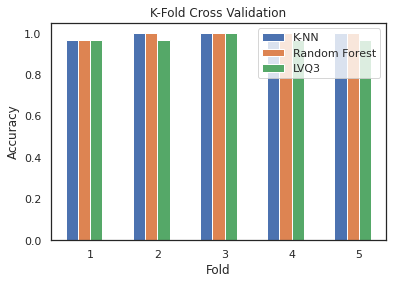

In [ ]:
#Show plot of comparisons
N = 5

ind = np.arange(N) 
width = 0.18
plt.bar(ind - width, knn_acc, width, label='K-NN')
plt.bar(ind, rfc_acc, width,
    label='Random Forest')
plt.bar(ind + width, lvq3_acc, width,
    label='LVQ3')

plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title('K-Fold Cross Validation')

plt.xticks(ind + width / 2, [i+1 for i in range(N)])
plt.legend(loc='best')
plt.show()